## Homework 8: Dataset: Slums of Hyderabad

The following dataset is a heavily cleaned up version of the official data on slums from the Government's Rajiv Awas Yojana Scheme's Slum Free City Action Plan of 2011. This dataset is the only geocoded data for slums in India. While the quality of data could be questionable, it still provides an insightful understanding of the spatial patterns of poverty in Indian cities. 

In [16]:
#Starting out the basics. 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
slums= pd.read_csv("hyderabad_slum_master.csv")

In [18]:
slums.head() #The dataset is a spatialised one, hence the_geom column. 

,name_of_the_slum,created_at,updated_at,the_geom,circle_number,ward_number,population,households,number_of_bpl_households,minority,...,structure_kuccha,avg_monthly_income,avg_monthly_expenditure,debts_outstanding,zerotoone_years_of_stay,onetothree_years_of_stay,threetofive_years_of_stay,morethanfive_years_of_stay,female_headed_households,age
0,Nirmal Nagar,0046-06-13 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000006...,16.0,134.0,1576.0,377.0,222.0,19.0,...,2.0,4769.0,4598,58836.0,8.0,11.0,12.0,346.0,71.0,NaN
1,Gandhi Nagar,0050-02-06 00:00:00.68-04:56:02,01:28.4,0106000020E61000000100000001030000000100000005...,1.0,1.0,3393.0,862.0,742.0,45.0,...,39.0,4893.0,4784,40130.0,32.0,25.0,31.0,774.0,85.0,NaN
2,ST Colony,0054-08-08 00:00:00.68-04:56:02,01:32.4,0106000020E61000000100000001030000000100000007...,1.0,1.0,740.0,181.0,168.0,5.0,...,1.0,4704.0,5046,37514.0,3.0,12.0,2.0,164.0,24.0,NaN
3,Kapra Old Village,0056-10-16 00:00:00.68-04:56:02,01:43.1,0106000020E61000000100000001030000000100000009...,1.0,1.0,1262.0,320.0,286.0,43.0,...,36.0,4253.0,6179,0.0,9.0,5.0,4.0,302.0,36.0,NaN
4,Yellareddyguda,0063-02-10 00:00:00.68-04:56:02,01:48.9,0106000020E6100000010000000103000000010000000B...,1.0,1.0,997.0,254.0,187.0,7.0,...,17.0,4132.0,4339,42728.0,7.0,3.0,7.0,237.0,31.0,NaN


Now let's look at the columns in the database.

In [19]:
slums.columns

Index(['name_of_the_slum', 'created_at', 'updated_at', 'the_geom',
       'circle_number', 'ward_number', 'population', 'households',
       'number_of_bpl_households', 'minority', 'caste_general', 'caste_sc',
       'caste_st', 'caste_obc', 'literacy_literates', 'literacy_illiterates',
       'tenure_patta', 'tenure_possession_certificate', 'tenure_private_land',
       'tenure_public', 'tenure_rented', 'tenure_others', 'structure_pucca',
       'structure_semipucca', 'structure_kuccha', 'avg_monthly_income',
       'avg_monthly_expenditure', 'debts_outstanding',
       'zerotoone_years_of_stay', 'onetothree_years_of_stay',
       'threetofive_years_of_stay', 'morethanfive_years_of_stay',
       'female_headed_households', 'age'],
      dtype='object')

So there are the following things in the dataset. 
* Name of the Slums

* The Municipal Circle and Ward Number

* The number of Households and Population slumwise.

* The number of Households that are Below Poverty Line (BPL) - It means there are people in slums who are not poor as defined by the government's definition. This becomes crucial because - it is often assumed that the slum is a proxy for urban poverty. Gautam Bhan and Arindam Jana's paper argues otherwise (http://epw.yodasoft.com/journal/2015/22/review-urban-affairs-review-issues/reading-spatial-inequality-urban-india.html)

* Caste Parameters : In Indian cities, Caste is an important index. The households that are "General", "Scheduled Caste", "Scheduled Tribe" or "Other Backward Castes" are all counted and have their own columns.

* Tenure Parameters: Because the dataset is primarily about eliminating slums with the idea of providing Government built houses, the land tenure status of the slum households is essential to know. They are Patta, Possession Certificate, Slums on Private Land, Slums on Public Land, Households that are renters and Other tenures that do not fit under this framework. 

* Structure of the House : This pertains to what kind of a house the slum dweller lives on. Pucca means a stable house made out of concrete, Semipucca could mean a not so stable house and Kuccha house means a house made out of mud/wood/etc. 

* Average Monthly Income, Expenditure and Debt.

* The number of years have the dwellers stayed in the slums 

* Number of Female Headed Households. 

## 1. What are the total number of slums in Hyderabad? What is the number of people who live in slums? How much percentage of the city's population lives in slums?

In [20]:
totalpopulation=slums['population'].sum()
print("The total number of people who live in slums in Hyderabad are",int(totalpopulation))
print("")
populationofhyderabad=6731790 #According to the 2011 census. 
percentageofpopulation=(totalpopulation/populationofhyderabad)*100
print("The percentage of people who live in slums is",(percentageofpopulation))

The total number of people who live in slums in Hyderabad are 1620452

The percentage of people who live in slums is 24.0716362216


A quarter of the city's population approximately lives in slums.

## 2. What is the average number of households in a slum? What is the average family size?

In [21]:
print("The total number of slum households is",slums['households'].sum())
print("")
print("The average number of households in a slum is",slums['households'].mean())
print("")
print("The average family size is", (slums['population'].sum()/slums['households'].sum()))

The total number of slum households is 380286.0

The average number of households in a slum is 272.802008608

The average family size is 4.26114029967


## 3. Which circles have the maximum number of slums?

Circle here refers to a Municipal Subdivision. The city is divided into 18 circles, with each circle being further subdivided into wards. The city has 150 of these wards. 

In [22]:
circle_count=slums['circle_number'].value_counts()
circle_count

4.0     190
9.0     183
10.0    159
7.0     137
18.0    119
5.0      75
3.0      70
15.0     65
14.0     63
16.0     52
17.0     49
1.0      48
8.0      44
6.0      39
11.0     37
12.0     30
2.0      27
13.0      7
Name: circle_number, dtype: int64

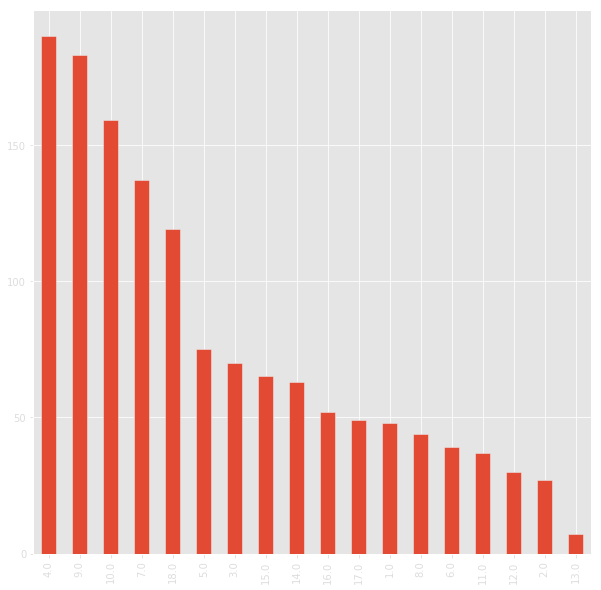

In [23]:
plt.style.use('ggplot')
circle_count.plot(kind='bar',x='Circle Number',y='Number of Slums',legend=False, figsize=(10,10))

Circle 4 - which is the old city quarter of Hyderabad has the maximum number of slums in terms of numbers. 

## 4. Which wards have the maximum number of slums?

In [24]:
slums['ward_number'].value_counts().head(20)

0.0      109
108.0     43
148.0     21
77.0      20
94.0      20
82.0      19
61.0      19
126.0     17
125.0     17
105.0     17
134.0     17
133.0     17
109.0     16
114.0     16
35.0      16
119.0     16
135.0     16
9.0       15
3.0       15
83.0      15
Name: ward_number, dtype: int64

Because the data is faulty, there are slums whose ward numbers is empty, ie 0.The remainder of the list are the ward numbers with maximum slums and on the right are the number of slums in them. That makes ward 108 have the maximum number of slums. On introspecting on a map(in CartoDB) - one is curious to know why is it that this ward has a highly fragmented number of slums, often not more than a couple of houses. 

## 5. What is the total literacy level in the slums? 

We count the total number of literates in each slum and compare it with the total population. 

In [25]:
print("The total percentage of literacy in slums is",(slums['literacy_literates'].sum())/(slums['population'].sum())*100)

The total percentage of literacy in slums is 90.7613431314


## 6. What percentage of households in the slum are BPL(Below Poverty Level)?

As argued above, there are valid concerns that the slum might not be a great proxy for urban powerty. But if the percentage of households that are Below Poverty Line is high enough, then the slum can be considered as a proxy for urban poverty.

In [26]:
(slums['number_of_bpl_households'].sum())/(slums['households'].sum())*100 

84.167968318581273

That is high enough for us to consider the slum as a decent proxy for urban poverty in Hyderabad. 

### The remaining data in its absolute number forms make it impossible for us to compare slums among each other. It would be useful to convert the caste, tenure, age, structures into percentages, making it easy to compare. 

Now, we create new columns in the dataframe using the existing columns and check. 

In [27]:
slums['percentageofliterates']=slums['literacy_literates']/slums['population']*100

In [28]:
slums['percentageofliterates'].mean()

89.81595730956937

On closer introspection, it is found that the other datasets are per household and not population wise like tha literacy percentage. So we do the addition of the following columns into the dataframe. So we repeat the above calculation for percentage of households below poverty line. 

In [29]:
slums['percentageofbplhouseholds']=slums['number_of_bpl_households']/slums['households']*100

Now we repeat this for the Caste Parameters. 

In [30]:
slums['percentageofgeneral'] = slums['caste_general']/slums['households']*100
slums['percentageofminority']= slums['minority']/slums['households']*100
slums['percentageofobc'] = slums['caste_obc']/slums['households']*100
slums['percentageofsc'] = slums['caste_sc']/slums['households']*100
slums['percentageofst'] = slums['caste_st']/slums['households']*100

And for the type of structures..

In [31]:
slums['percentageofpuccastructures'] = slums['structure_pucca']/slums['households']*100
slums['percentageofsemipuccastructures'] = slums['structure_semipucca']/slums['households']*100
slums['percentageofkucchastructures'] = slums['structure_kuccha']/slums['households']*100

.. And for the kind of tenure

In [32]:
slums['percentageoftenure_patta'] = slums['tenure_patta']/slums['households']*100
slums['percentageoftenure_pc'] = slums['tenure_possession_certificate']/slums['households']*100
slums['percentageoftenure_private'] = slums['tenure_private_land']/slums['households']*100
slums['percentageoftenure_public'] = slums['tenure_public']/slums['households']*100
slums['percentageoftenure_renters'] = slums['tenure_rented']/slums['households']*100
slums['percentageoftenure_other'] = slums['tenure_others']/slums['households']*100

and finally for the number of years the residents have stayed..

In [33]:

slums['percentageoftenure_0to1'] = slums['zerotoone_years_of_stay']/slums['households']*100
slums['percentageoftenure_1to3'] = slums['onetothree_years_of_stay']/slums['households']*100
slums['percentageoftenure_3to5'] = slums['threetofive_years_of_stay']/slums['households']*100
slums['percentageoftenure_morethan5'] = slums['morethanfive_years_of_stay']/slums['households']*100

Now, let us see how the slums dataframe looks like

In [34]:
slums.head()

,name_of_the_slum,created_at,updated_at,the_geom,circle_number,ward_number,population,households,number_of_bpl_households,minority,...,percentageoftenure_patta,percentageoftenure_pc,percentageoftenure_private,percentageoftenure_public,percentageoftenure_renters,percentageoftenure_other,percentageoftenure_0to1,percentageoftenure_1to3,percentageoftenure_3to5,percentageoftenure_morethan5
0,Nirmal Nagar,0046-06-13 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000006...,16.0,134.0,1576.0,377.0,222.0,19.0,...,61.538462,2.387268,0.530504,0.000000,34.748011,0.795756,2.122016,2.917772,3.183024,91.777188
1,Gandhi Nagar,0050-02-06 00:00:00.68-04:56:02,01:28.4,0106000020E61000000100000001030000000100000005...,1.0,1.0,3393.0,862.0,742.0,45.0,...,32.830626,8.932715,0.000000,0.000000,57.888631,0.348028,3.712297,2.900232,3.596288,89.791183
2,ST Colony,0054-08-08 00:00:00.68-04:56:02,01:32.4,0106000020E61000000100000001030000000100000007...,1.0,1.0,740.0,181.0,168.0,5.0,...,40.331492,13.812155,0.000000,6.077348,39.226519,0.552486,1.657459,6.629834,1.104972,90.607735
3,Kapra Old Village,0056-10-16 00:00:00.68-04:56:02,01:43.1,0106000020E61000000100000001030000000100000009...,1.0,1.0,1262.0,320.0,286.0,43.0,...,55.000000,28.750000,0.625000,0.000000,15.312500,0.312500,2.812500,1.562500,1.250000,94.375000
4,Yellareddyguda,0063-02-10 00:00:00.68-04:56:02,01:48.9,0106000020E6100000010000000103000000010000000B...,1.0,1.0,997.0,254.0,187.0,7.0,...,83.858268,4.330709,0.787402,0.000000,7.086614,3.937008,2.755906,1.181102,2.755906,93.307087


In [35]:
slums.columns

Index(['name_of_the_slum', 'created_at', 'updated_at', 'the_geom',
       'circle_number', 'ward_number', 'population', 'households',
       'number_of_bpl_households', 'minority', 'caste_general', 'caste_sc',
       'caste_st', 'caste_obc', 'literacy_literates', 'literacy_illiterates',
       'tenure_patta', 'tenure_possession_certificate', 'tenure_private_land',
       'tenure_public', 'tenure_rented', 'tenure_others', 'structure_pucca',
       'structure_semipucca', 'structure_kuccha', 'avg_monthly_income',
       'avg_monthly_expenditure', 'debts_outstanding',
       'zerotoone_years_of_stay', 'onetothree_years_of_stay',
       'threetofive_years_of_stay', 'morethanfive_years_of_stay',
       'female_headed_households', 'age', 'percentageofliterates',
       'percentageofbplhouseholds', 'percentageofgeneral',
       'percentageofminority', 'percentageofobc', 'percentageofsc',
       'percentageofst', 'percentageofpuccastructures',
       'percentageofsemipuccastructures', 'percenta

We now have the data with all the calculations necessary made for analysis and now we begin. 

## CASTE PARAMETERS

#### 7. Which slums have the highest percentage of households that belong to the General Caste?

In [36]:
slums.sort_values(by='percentageofgeneral').head(5)

,name_of_the_slum,created_at,updated_at,the_geom,circle_number,ward_number,population,households,number_of_bpl_households,minority,...,percentageoftenure_patta,percentageoftenure_pc,percentageoftenure_private,percentageoftenure_public,percentageoftenure_renters,percentageoftenure_other,percentageoftenure_0to1,percentageoftenure_1to3,percentageoftenure_3to5,percentageoftenure_morethan5
652,Kashiram Jeera,0019-08-08 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000008...,9.0,81.0,112.0,29.0,27.0,0.0,...,72.413793,0.000000,13.793103,0.000000,10.344828,3.448276,0.000000,0.000000,0.000000,100.000000
439,Taranagar Weaker Section Colony,0001-11-05 00:00:00.68-04:56:02,26:43.2,0106000020E6100000010000000103000000010000000C...,12.0,114.0,35.0,9.0,8.0,0.0,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
232,"Bandambi,Turakapalli Bollaram",0018-08-10 00:00:00.68-04:56:02,26:43.2,0106000020E6100000010000000103000000010000000D...,16.0,133.0,278.0,68.0,66.0,0.0,...,30.882353,0.000000,0.000000,19.117647,10.294118,39.705882,10.294118,2.941176,0.000000,86.764706
1284,Prakash Nagar i8,0010-11-14 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000005...,18.0,148.0,181.0,45.0,36.0,5.0,...,71.111111,24.444444,2.222222,0.000000,2.222222,0.000000,0.000000,0.000000,13.333333,86.666667
253,Kranthi Nagar,0053-03-13 00:00:00.68-04:56:02,26:43.2,0106000020E6100000010000000103000000010000000D...,4.0,27.0,208.0,51.0,51.0,0.0,...,88.235294,0.000000,0.000000,0.000000,11.764706,0.000000,0.000000,0.000000,0.000000,100.000000


#### 8. Which slums have the highest percentage of households that belong to the SC Caste?

In [37]:
slums.sort_values(by='percentageofsc').head(5)

,name_of_the_slum,created_at,updated_at,the_geom,circle_number,ward_number,population,households,number_of_bpl_households,minority,...,percentageoftenure_patta,percentageoftenure_pc,percentageoftenure_private,percentageoftenure_public,percentageoftenure_renters,percentageoftenure_other,percentageoftenure_0to1,percentageoftenure_1to3,percentageoftenure_3to5,percentageoftenure_morethan5
1016,Mecca Masjid,0032-06-10 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000005...,5.0,48.0,832.0,151.0,149.0,150.0,...,22.516556,0.0,1.324503,46.357616,29.139073,0.662252,1.324503,0.000000,0.000000,98.675497
697,Ashok Nagar,0056-08-12 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000015...,9.0,83.0,283.0,60.0,58.0,55.0,...,8.333333,0.0,58.333333,0.000000,33.333333,0.000000,1.666667,0.000000,0.000000,98.333333
238,"Ekalavya nagar,Weaker Section",0031-01-12 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000009...,16.0,133.0,133.0,36.0,36.0,0.0,...,61.111111,0.0,0.000000,0.000000,38.888889,0.000000,22.222222,2.777778,0.000000,75.000000
1085,Andooroon Karwan,0003-11-07 00:00:00.68-04:56:02,26:43.2,0106000020E6100000010000000103000000010000000A...,7.0,61.0,956.0,242.0,93.0,109.0,...,42.561983,0.0,0.413223,0.413223,42.148760,14.462810,0.413223,0.413223,0.413223,98.760331
926,Nazeer Nagar,0032-07-12 00:00:00.68-04:56:02,26:43.2,0106000020E6100000010000000103000000010000000A...,9.0,81.0,170.0,42.0,42.0,0.0,...,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000


#### 9. Which slums have the highest percentage of households that belong to the ST Caste?

In [38]:
slums.sort_values(by='percentageofst').head(5)

,name_of_the_slum,created_at,updated_at,the_geom,circle_number,ward_number,population,households,number_of_bpl_households,minority,...,percentageoftenure_patta,percentageoftenure_pc,percentageoftenure_private,percentageoftenure_public,percentageoftenure_renters,percentageoftenure_other,percentageoftenure_0to1,percentageoftenure_1to3,percentageoftenure_3to5,percentageoftenure_morethan5
1394,Ayyappa Colony Slum,0060-01-08 00:00:00.68-04:56:02,02:15.5,0106000020E61000000100000001030000000100000008...,3.0,9.0,408.0,89.0,88.0,3.0,...,56.179775,0.000000,0.000000,0.000000,26.966292,16.853933,2.247191,3.370787,0.000000,94.382022
888,Thalla Basthi(non),0017-02-14 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000007...,9.0,94.0,126.0,33.0,33.0,1.0,...,3.030303,0.000000,0.000000,0.000000,69.696970,27.272727,30.303030,3.030303,0.000000,66.666667
891,Anna Nagar,0029-03-10 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000007...,9.0,94.0,245.0,63.0,61.0,5.0,...,1.587302,0.000000,22.222222,76.190476,0.000000,0.000000,1.587302,0.000000,0.000000,98.412698
894,Deen Dayal Nagar,0036-09-07 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000008...,9.0,94.0,419.0,97.0,78.0,7.0,...,70.103093,5.154639,0.000000,0.000000,18.556701,6.185567,2.061856,1.030928,0.000000,96.907216
896,Gudalal Basthi,0002-11-08 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000006...,9.0,94.0,299.0,81.0,75.0,3.0,...,11.111111,1.234568,45.679012,0.000000,40.740741,1.234568,1.234568,2.469136,4.938272,91.358025


#### 10. Which slums have the highest percentage of households that belong to the OBC Caste?

In [39]:
slums.sort_values(by='percentageofobc').head(5)

,name_of_the_slum,created_at,updated_at,the_geom,circle_number,ward_number,population,households,number_of_bpl_households,minority,...,percentageoftenure_patta,percentageoftenure_pc,percentageoftenure_private,percentageoftenure_public,percentageoftenure_renters,percentageoftenure_other,percentageoftenure_0to1,percentageoftenure_1to3,percentageoftenure_3to5,percentageoftenure_morethan5
1172,Ambedkar Individual Colony,0006-07-12 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000005...,10.0,108.0,158.0,41.0,33.0,14.0,...,70.731707,0.000000,0.000000,0.000000,29.268293,0.000000,2.439024,0.000000,4.878049,92.682927
1351,Kimthi Colony,0041-07-03 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000005...,18.0,140.0,149.0,33.0,28.0,0.0,...,0.000000,3.030303,48.484848,0.000000,0.000000,48.484848,0.000000,0.000000,0.000000,100.000000
327,Dood Khana Galli,0061-02-07 00:00:00.68-04:56:02,26:43.2,0106000020E6100000010000000103000000010000000F...,4.0,42.0,1195.0,307.0,218.0,1.0,...,25.081433,14.657980,0.325733,0.000000,59.283388,0.651466,13.355049,8.794788,3.908795,73.941368
1000,Palem Road,0029-12-11 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000007...,5.0,54.0,869.0,157.0,34.0,148.0,...,2.547771,3.184713,25.477707,0.000000,68.152866,0.636943,3.821656,0.636943,0.636943,94.904459
757,M.M. Pahadi,0048-04-14 00:00:00.68-04:56:02,26:43.2,0106000020E61000000100000001030000000100000008...,6.0,60.0,3729.0,697.0,572.0,427.0,...,49.928264,0.860832,13.629842,0.430416,34.720230,0.430416,6.025825,6.025825,6.599713,81.348637


Now, we see what percentage of each of these castes live in slums.

In [48]:
a=slums['percentageofgeneral'].mean()
b=slums['percentageofsc'].mean()
c=slums['percentageofst'].mean()
d=slums['percentageofobc'].mean()
print(a,b,c,d)


25.1731439978 24.3594508224 3.89997499162 46.5674301882


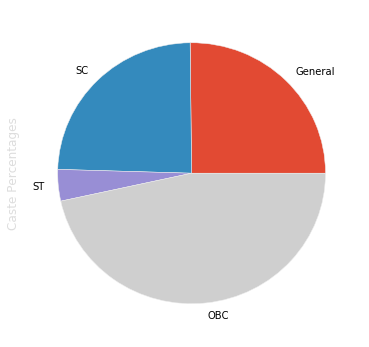

In [49]:
plt.style.use('ggplot')
series=pd.Series([a,b,c,d], index=['General', 'SC', 'ST','OBC'], name='Caste Percentages')
series.plot.pie(figsize=(6, 6))

## STRUCTURES OF HOUSES

Now let us see the number of households that are proper pucca structures:
#### 11. What percentage of Households are Pucca Structures?

In [50]:
a=slums['percentageofpuccastructures'].mean()

That's roughly about half of them. What about the remaining half?
#### 12. What percentage of Households are Semi-pucca Structures?

In [51]:
b=slums['percentageofsemipuccastructures'].mean()

That still leaves out a little bit more... and the remaining structures are made out of..
#### 13. What percentage of Households are Neither Semipucca or Pucca Structures?

In [52]:
c=slums['percentageofkucchastructures'].mean()


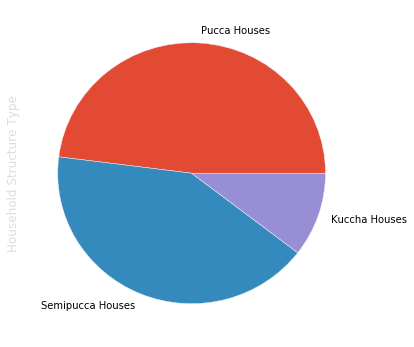

In [53]:
plt.style.use('ggplot')
series=pd.Series([a,b,c], index=['Pucca Houses', 'Semipucca Houses', 'Kuccha Houses'], name='Household Structure Type')
series.plot.pie(figsize=(6, 6))

Kaccha houses. 

## LAND TENURE DETAILS

#### 14. What percentage of Households have access to Pattas?

In [54]:
a=slums['percentageoftenure_patta'].mean()


#### 15. What percentage of Households have access to Possession Certificates?

In [55]:
b=slums['percentageoftenure_pc'].mean()


#### 16. What percentage of Households are on Private Land?

In [56]:
c=slums['percentageoftenure_private'].mean()

#### 17. What percentage of Households are on Public Land?

In [57]:
d=slums['percentageoftenure_public'].mean()

#### 18. What percentage of Households are Renters?

In [58]:
e=slums['percentageoftenure_renters'].mean()

#### 19. What percentage of Households don't fit in any of the other categories?

In [59]:
f=slums['percentageoftenure_other'].mean()

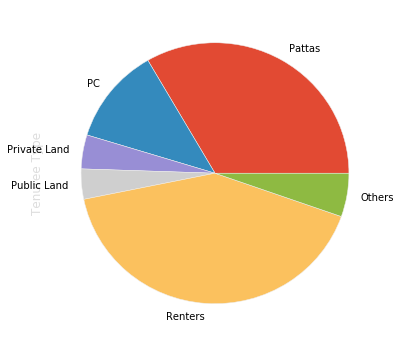

In [60]:
plt.style.use('ggplot')
series=pd.Series([a,b,c,d,e,f], index=['Pattas', 'PC', 'Private Land','Public Land','Renters','Others'], name='Tenuree Type')
series.plot.pie(figsize=(6, 6))

## WHEN HAVE PEOPLE MOVED IN

#### 20. What percentage of Households have moved in the last one year?

In [61]:
a=slums['percentageoftenure_0to1'].mean()

5.6785803854119798

#### 21. What percentage of Households have moved in the last one to three years?

In [62]:
b=slums['percentageoftenure_1to3'].mean()

3.6704461859932622

#### 22. What percentage of Households have moved in the last three to five years?

In [63]:
c=slums['percentageoftenure_3to5'].mean()

3.4221084010230967

#### 23. What percentage of Households have moved more than five years ago?

In [64]:
d=slums['percentageoftenure_morethan5'].mean()

87.228865027571658

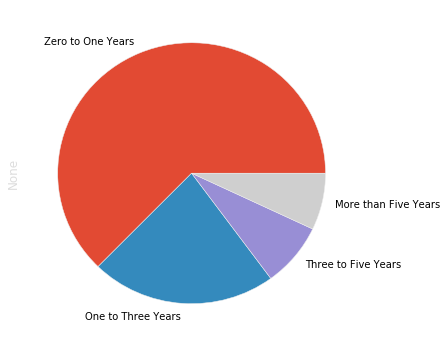

In [67]:
plt.style.use('ggplot')
series=pd.Series([a,b,c,d], index=['Zero to One Years', 'One to Three Years', 'Three to Five Years','More than Five Years'])
series.plot.pie(figsize=(6, 6))

## INCOME, EXPENDITURE, DEBT

####  24. What is the average monthly income of a slum household? (in rupees, 70 rupees make a dollar)

In [212]:
slums['avg_monthly_income'].mean()

3799.3493543758968

#### 25. What is the average monthly expenditure of a slum household? (in rupees, 70 rupees make a dollar)

In [213]:
slums['avg_monthly_expenditure'].mean()

3776.6881720430106

####  26. What is the average debt per slum?(in rupees, 70 rupees make a dollar)

In [211]:
slums['debts_outstanding'].mean()

19861.378766140602